# Exploring UFRN Library Data: My 7-Day Journey with Python Pandas

## Introduction
---
In this #7DaysOfCode, I'll explore loan data from UFRN's library system using Python Pandas. Through Exploratory Data Analysis (EDA), I'll practice data manipulation, visualization, and analysis while extracting insights and generating new questions from the data.

I'll work with various Pandas functionalities - from importing different data formats to creating stylized export tables. The goal is to understand how university libraries can use data analysis to make informed decisions about their processes, users, and resources to better facilitate knowledge production.

# Steps
---

## 1. Importing libraries and datasets & Data cleaning

In [1]:
!pip install openpyxl==3.1.5

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import openpyxl


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Setting global options for pandas and matplotlib
pd.set_option('display.max_columns', None)
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1.5, rc={'figure.figsize': (20, 10)})

In [3]:
# Importing loan data from 2010 to 2020 (20 periods, each semester) individually.
data_2010_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20101.csv')
data_2010_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20102.csv')
data_2011_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20111.csv')
data_2011_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20112.csv')
data_2012_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20121.csv')
data_2012_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20122.csv')
data_2013_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20131.csv')
data_2013_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20132.csv')
data_2014_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20141.csv')
data_2014_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20142.csv')
data_2015_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20151.csv')
data_2015_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20152.csv')
data_2016_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20161.csv')
data_2016_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20162.csv')
data_2017_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20171.csv')
data_2017_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20172.csv')
data_2018_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20181.csv')
data_2018_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20182.csv')
data_2019_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20191.csv')
data_2019_2 = pd.read_csv('/work/data_files/loans_data/emprestimos-20192.csv')
data_2020_1 = pd.read_csv('/work/data_files/loans_data/emprestimos-20201.csv')

In [4]:
# Concatenating all semester-wise loan datasets into one comprehensive DataFrame named `library_loans`.
library_loans = pd.concat([
    data_2010_1, data_2010_2, data_2011_1, data_2011_2, data_2012_1, data_2012_2, data_2013_1, data_2013_2, data_2014_1, data_2014_2,
    data_2015_1, data_2015_2, data_2016_1, data_2016_2, data_2017_1, data_2017_2, data_2018_1, data_2018_2, data_2019_1, data_2019_2,
    data_2020_1
], ignore_index=True)

# Removing duplicates based on `id_emprestimo` and `matricula_ou_siape`.
library_loans.drop_duplicates(subset=['id_emprestimo', 'matricula_ou_siape'], keep='first', inplace=True)

In [5]:
# Importing additional book-related information from the `data_books` dataset.
data_books = pd.read_parquet('/work/data_files/books_data.parquet')

# Merging the `library_loans` dataset with the `data_books` dataset.
library_loans = library_loans.merge(data_books)

In [6]:
# Adding UDC Categorization based on `localizacao` attribute.
def categorize_udc(localizacao):
    if localizacao < 100:
        return "Science and Knowledge"
    elif localizacao < 200:
        return "Philosophy and Psychology"
    elif localizacao < 300:
        return "Religion"
    elif localizacao < 400:
        return "Social Sciences"
    elif localizacao < 500:
        return "Vacant"
    elif localizacao < 600:
        return "Mathematics and Natural Sciences"
    elif localizacao < 700:
        return "Applied Sciences"
    elif localizacao < 800:
        return "The Arts"
    elif localizacao < 900:
        return "Linguistic"
    else:
        return "Geography, Biography and History"

library_loans['UDC'] = library_loans['localizacao'].apply(categorize_udc)

In [7]:
# Dropping irrelevant columns
library_loans.drop(columns='registro_sistema', axis=1, inplace=True)

## 2. Exploratory Data Analysis (EDA)

In [8]:
# Calculating total loans and books
loans_total = len(library_loans['id_emprestimo'].drop_duplicates())
books_total = len(library_loans['id_emprestimo'])

In [9]:
# Working with datetime for loan analysis
loans_date = pd.DataFrame(library_loans['data_emprestimo'].value_counts()).reset_index()
loans_date.columns = ['date', 'quantity']
loans_date['date'] = pd.to_datetime(loans_date['date'])

Text(0.0, 1.0, 'Number of copies borrowed from SISBI per year\n')

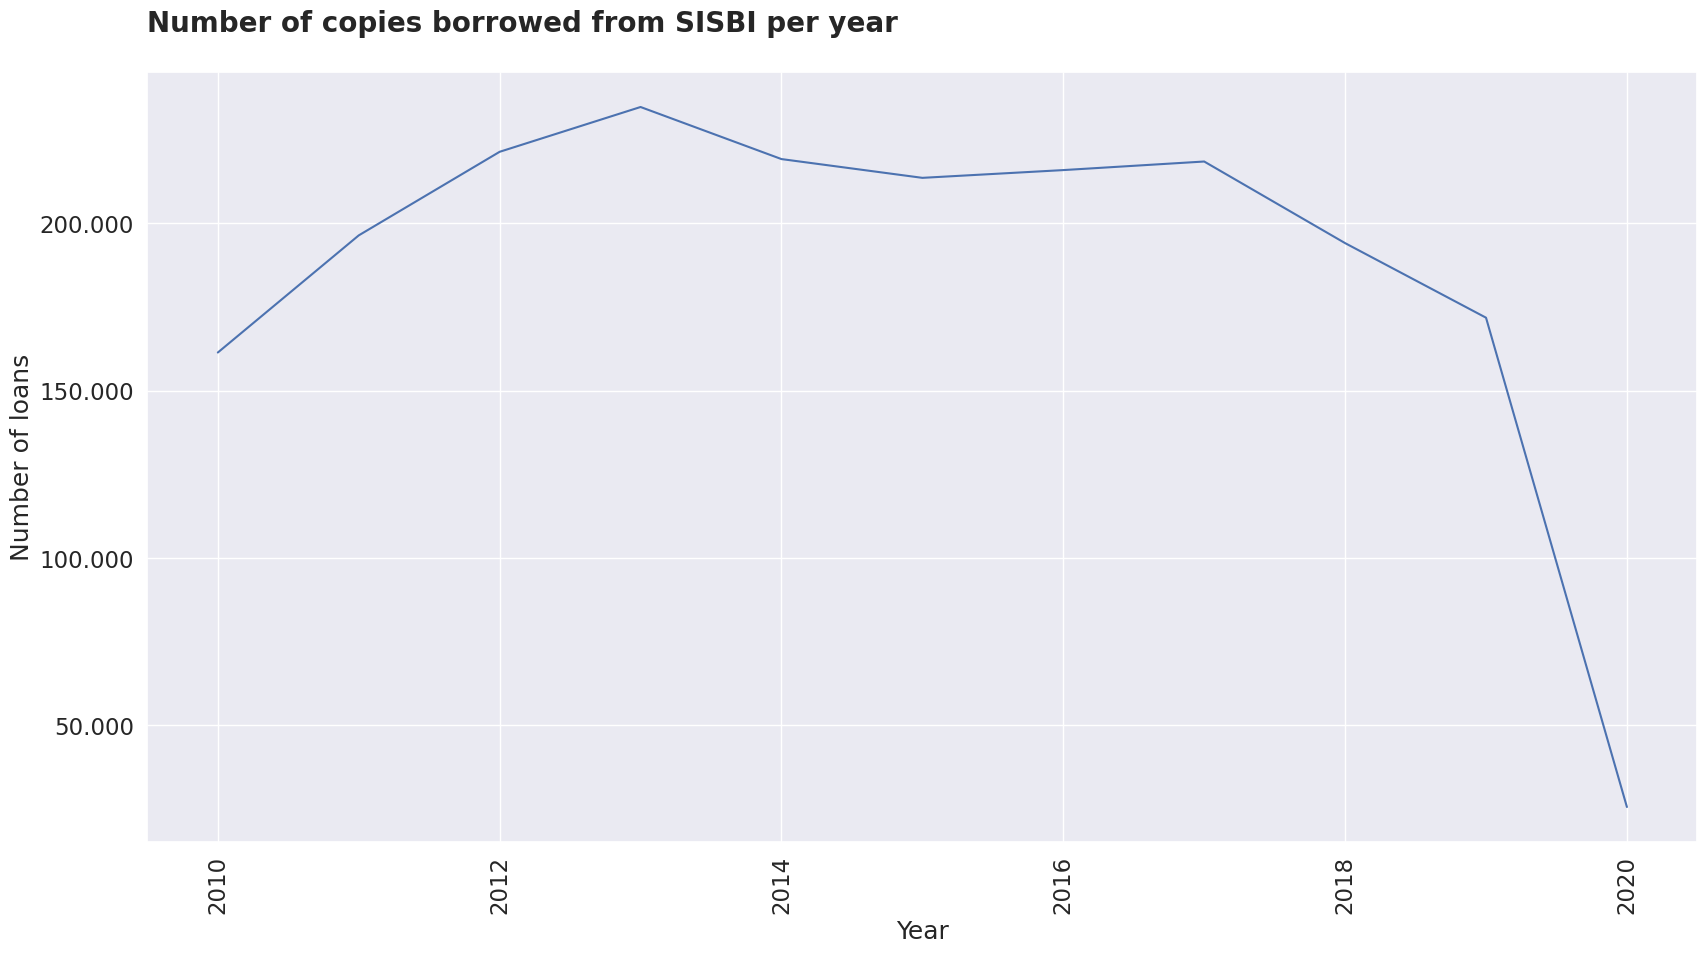

In [10]:
# Grouping loans by year
loans_by_year = loans_date.groupby(loans_date['date'].dt.year)['quantity'].sum()
loans_by_year.index.name = 'year'

# Plotting loans by year
ax = sns.lineplot(x=loans_by_year.index, y=loans_by_year.values)
ax.set(xlabel='Year', ylabel='Number of loans')
ax.tick_params(axis='x', rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
ax.set_title('Number of copies borrowed from SISBI per year\n', size=20, loc='left', weight='bold')

Text(-0.5, 265000, 'Period from 2010 to 2020')

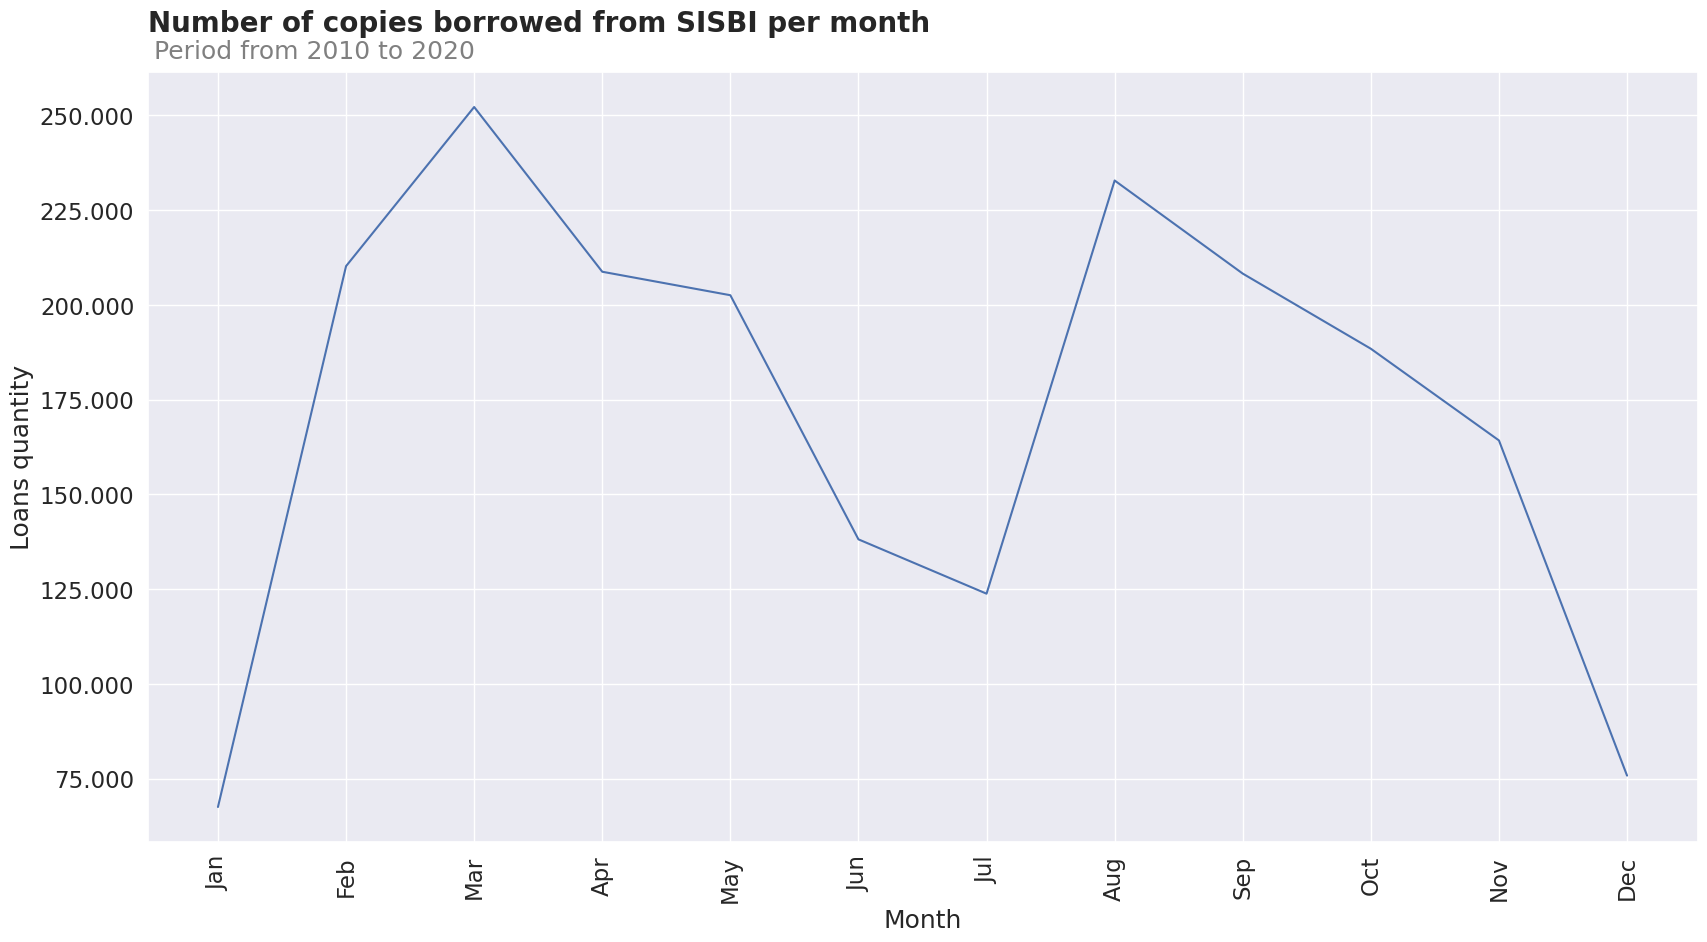

In [11]:
# Grouping loans by month
books_by_month = loans_date.groupby(loans_date['date'].dt.month)['quantity'].sum()
books_by_month.index.name = 'month'

# Mapping month numbers to names
month = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
books_by_month.index = books_by_month.index.map(month)

# Plotting loans by month
ax = sns.lineplot(x=books_by_month.index, y=books_by_month.values)
ax.set(xlabel='Month', ylabel='Loans quantity')
ax.tick_params(axis='x', labelrotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
ax.set_title('Number of copies borrowed from SISBI per month\n', size=20, loc='left', weight='bold')
ax.text(s='Period from 2010 to 2020', x=-0.5, y=265000, fontsize=18, ha='left', color='gray')

Text(-0.5, 225000, 'Period from 2010 to 2020')

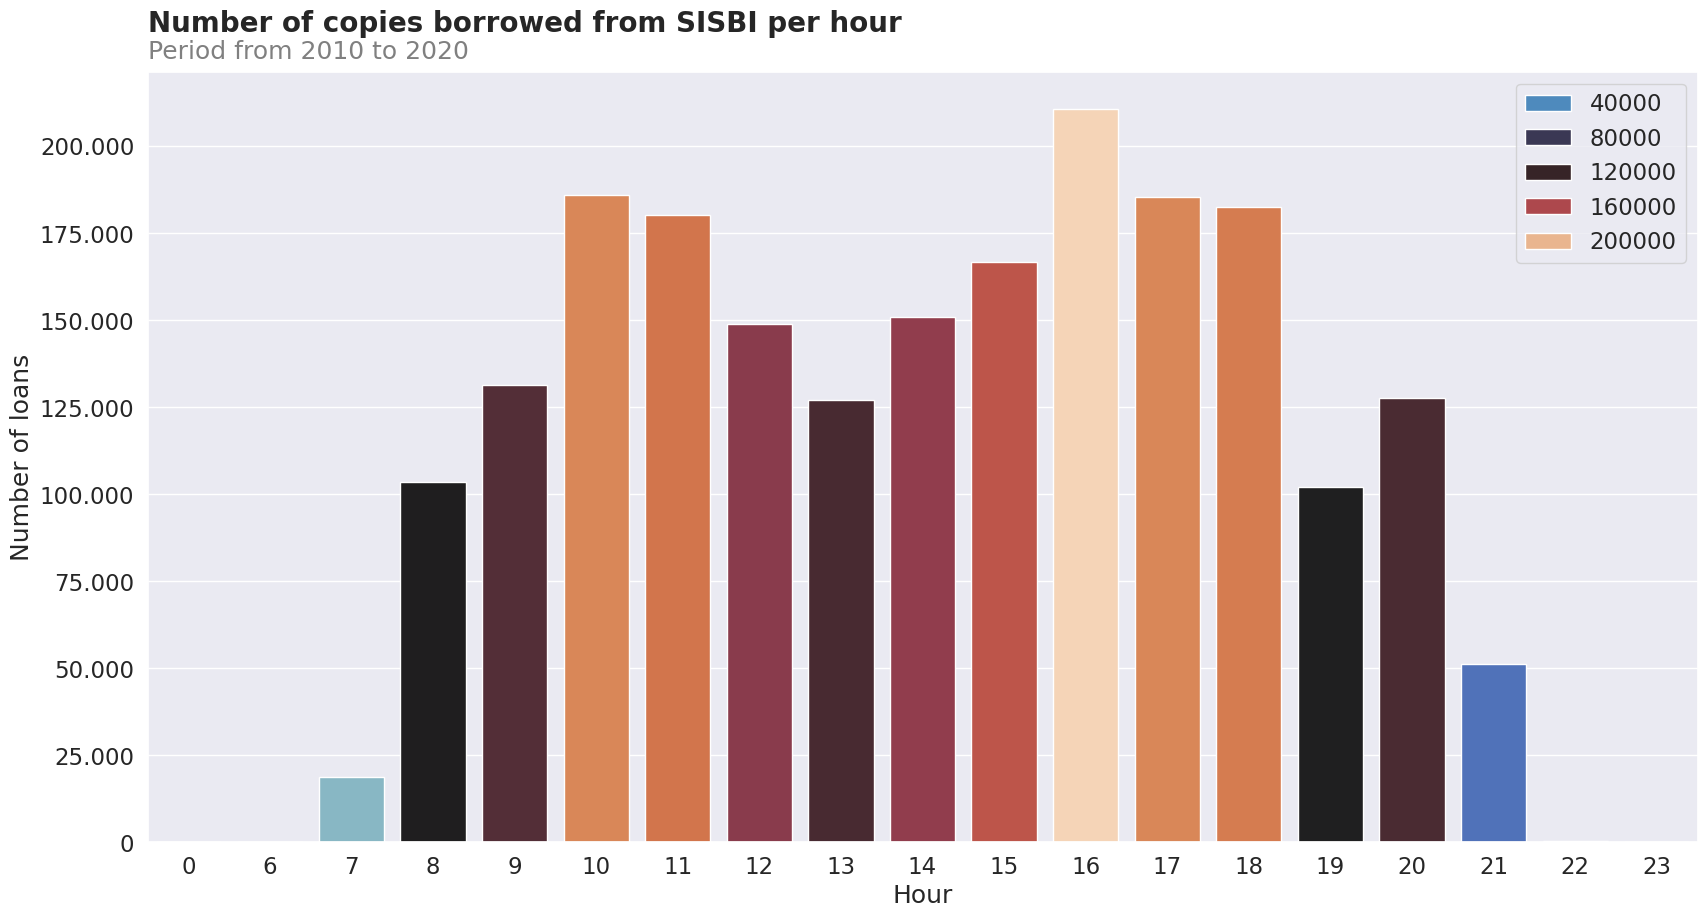

In [12]:
# Grouping loans by hour
by_hours = loans_date.groupby(loans_date['date'].dt.hour)['quantity'].sum()
by_hours.index.name = 'hour'

# Plotting loans by hour
ax = sns.barplot(
    x=by_hours.index,
    y=by_hours.values,
    palette='icefire',
    hue=by_hours.values,
    dodge=False
)
ax.set(xlabel='Hour', ylabel='Number of loans')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
ax.set_title('Number of copies borrowed from SISBI per hour\n', size=20, loc='left', weight='bold')
ax.text(s='Period from 2010 to 2020', x=-0.5, y=225000, fontsize=18, ha='left', color='gray')

Text(-0.5, 1715000, 'Period from 2010 to 2020')

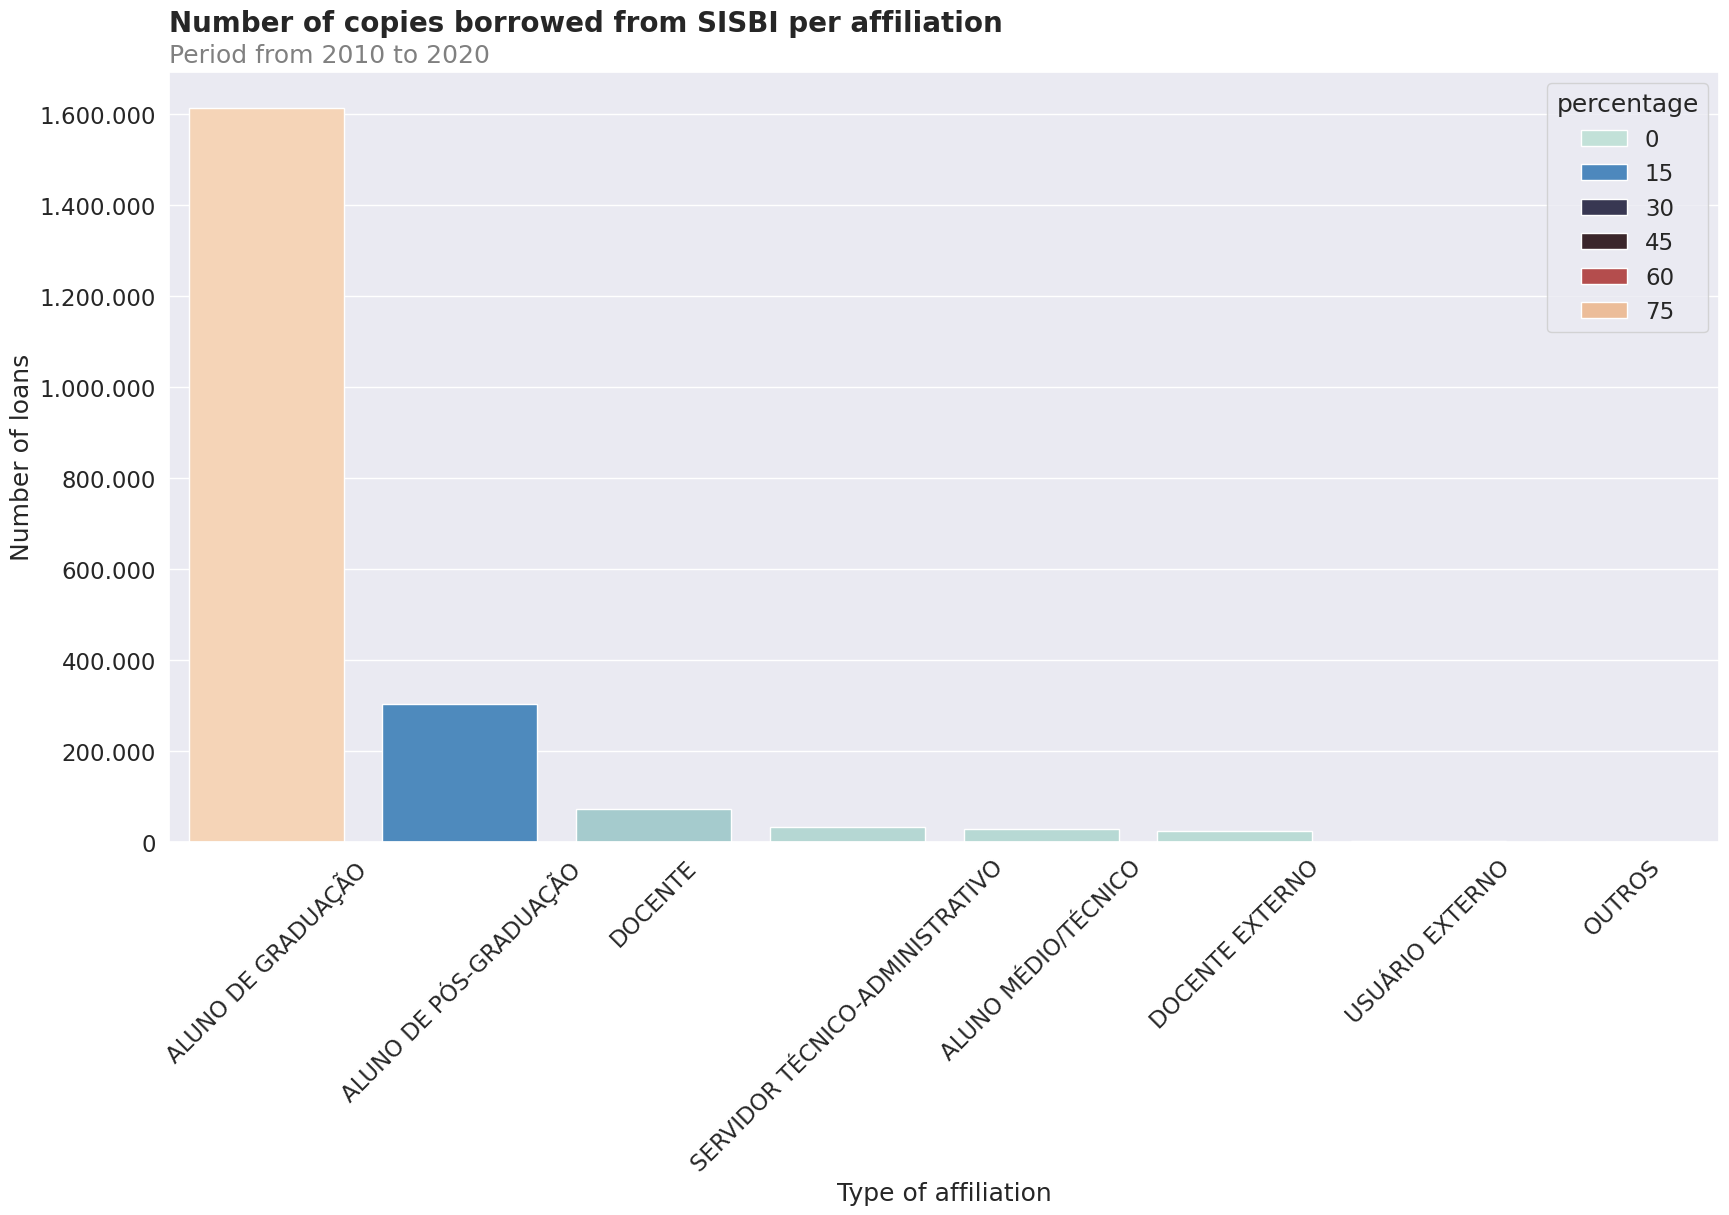

In [13]:
# Function to generate frequency table for a variable
def frequency_table(variable):
    dataframe = pd.DataFrame(library_loans[variable].value_counts()).reset_index()
    dataframe.columns = [variable, 'quantity']
    dataframe['percentage'] = round((dataframe['quantity'] / dataframe['quantity'].sum()) * 100, 2)
    return dataframe

# Generating frequency table for user types
user_type_freq = frequency_table('tipo_vinculo_usuario')

# Plotting user type analysis
ax = sns.barplot(
    x='tipo_vinculo_usuario',
    y='quantity',
    data=user_type_freq,
    palette='icefire',
    hue=user_type_freq['percentage'],
    dodge=False
)
ax.set(xlabel='Type of affiliation', ylabel='Number of loans')
ax.tick_params(axis='x', rotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
ax.set_title('Number of copies borrowed from SISBI per affiliation\n', size=20, loc='left', weight='bold')
ax.text(s='Period from 2010 to 2020', x=-0.5, y=1715000, fontsize=18, ha='left', color='gray')

In [14]:
# Generating frequency table for collections
collection_freq = frequency_table('colecao')

# Generating frequency table for libraries
library_freq = frequency_table('biblioteca')

# Generating frequency table for UDC categories
udc_freq = frequency_table('UDC')

# Displaying the frequency tables
collection_freq, library_freq, udc_freq

(                                  colecao  quantity  percentage
 0                       Acervo Circulante   2053120       99.06
 1                              Multimeios      7954        0.38
 2                             Monografias      4021        0.19
 3                            Dissertações      2406        0.12
 4                     Obras de Referência      1954        0.09
 5            Publicações de Autores do RN       866        0.04
 6                     Publicações da UFRN       764        0.04
 7                                   Teses       714        0.03
 8                                Folhetos       271        0.01
 9   Necessidades Educacionais Específicas       130        0.01
 10                     Trabalho Acadêmico       115        0.01
 11                                Eventos       101        0.00
 12                    Coleção Mossoroense        44        0.00
 13                    Coleção Zila Mamede        30        0.00
 14                   Lit

/tmp/ipykernel_620/618073711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grad_student_ac['data_emprestimo'] = pd.to_datetime(grad_student_ac['data_emprestimo'])
/tmp/ipykernel_620/618073711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grad_student_ac['year'] = grad_student_ac['data_emprestimo'].dt.year
/tmp/ipykernel_620/618073711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

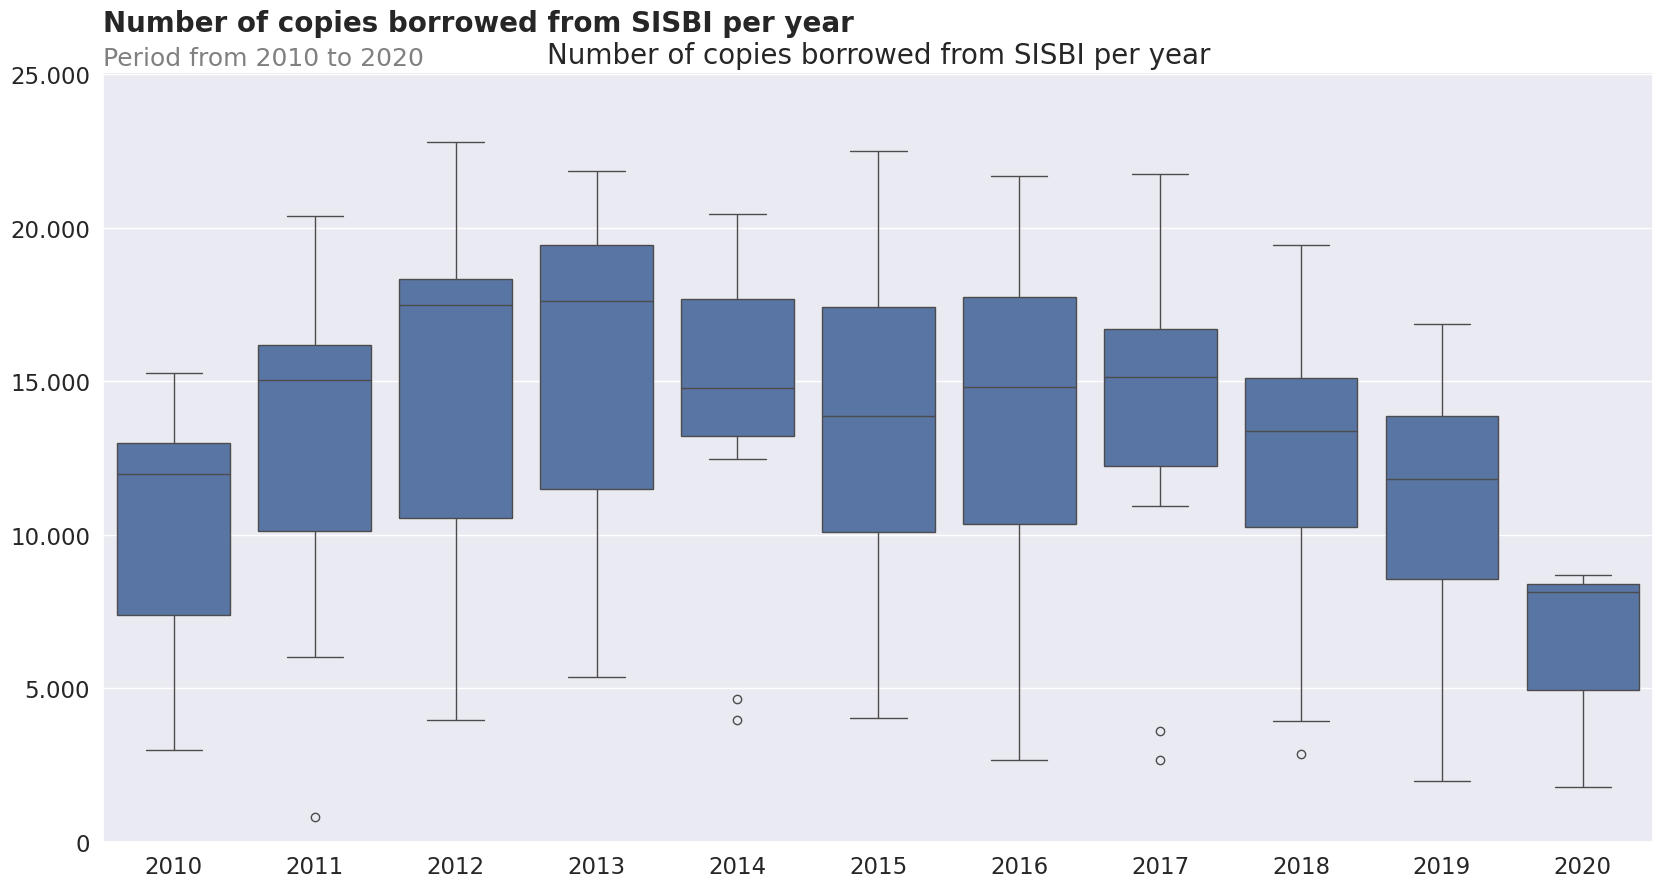

In [15]:
# Filtering data for graduate students
grad_student = library_loans.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO'")

# Filtering data for 'Acervo Circulante' collection
grad_student_ac = grad_student.query("colecao == 'Acervo Circulante'")
grad_student_ac['data_emprestimo'] = pd.to_datetime(grad_student_ac['data_emprestimo'])
grad_student_ac['year'] = grad_student_ac['data_emprestimo'].dt.year
grad_student_ac['month'] = grad_student_ac['data_emprestimo'].dt.month
grad_student_ac = grad_student_ac.loc[:, ['year', 'month']]
grad_student_ac = grad_student_ac.value_counts().to_frame('quantity').reset_index()

# Plotting graduate student analysis
def generate_boxplot(dataset, x, y, title, subtitle):
    ax = sns.boxplot(x=x, y=y, data=dataset)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))
    plt.ylim(0, max(dataset[y]) * 1.1)
    plt.title(title, fontsize=20)
    plt.xlabel(None)
    plt.ylabel(None)
    ax.set_title(title + "\n", size=20, loc='left', weight='bold')
    ax.text(s=subtitle, x=-0.5, y=max(dataset[y]) * 1.11, fontsize=18, ha='left', color='gray')

# Generating boxplot for graduate students
generate_boxplot(grad_student_ac, 'year', 'quantity', 'Number of copies borrowed from SISBI per year', 'Period from 2010 to 2020')

/tmp/ipykernel_620/3763175968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posgrad_student_ac['data_emprestimo'] = pd.to_datetime(posgrad_student_ac['data_emprestimo'])
/tmp/ipykernel_620/3763175968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posgrad_student_ac['year'] = posgrad_student_ac['data_emprestimo'].dt.year
/tmp/ipykernel_620/3763175968.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

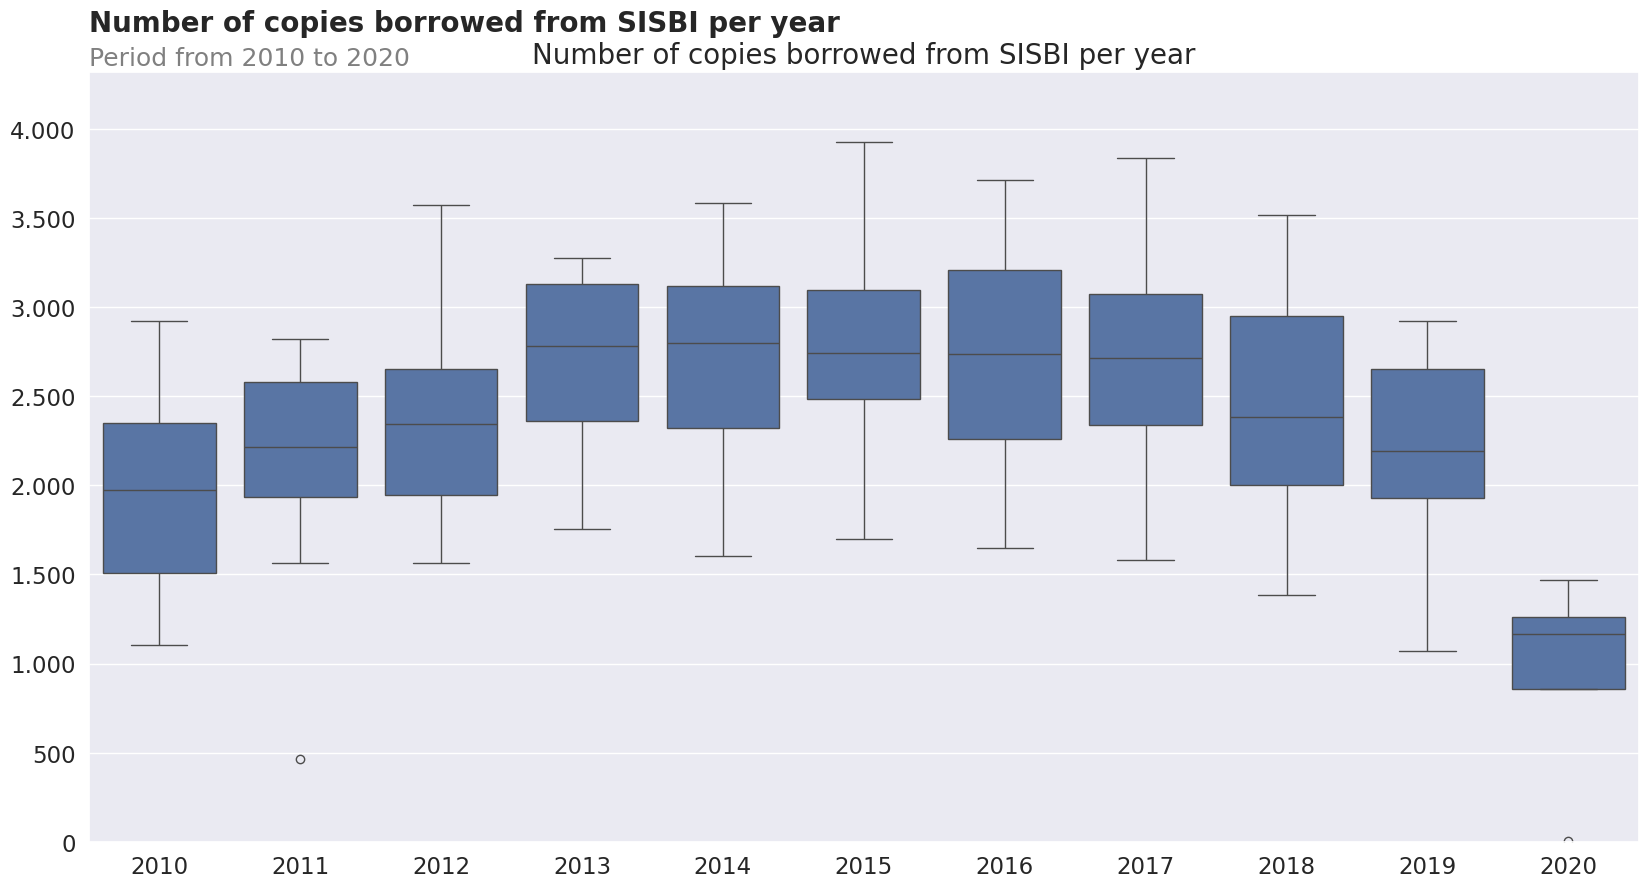

In [16]:
# Filtering data for postgraduate students
posgrad_student = library_loans.query("tipo_vinculo_usuario == 'ALUNO DE PÓS-GRADUAÇÃO'")

# Filtering data for 'Acervo Circulante' collection
posgrad_student_ac = posgrad_student.query("colecao == 'Acervo Circulante'")
posgrad_student_ac['data_emprestimo'] = pd.to_datetime(posgrad_student_ac['data_emprestimo'])
posgrad_student_ac['year'] = posgrad_student_ac['data_emprestimo'].dt.year
posgrad_student_ac['month'] = posgrad_student_ac['data_emprestimo'].dt.month
posgrad_student_ac = posgrad_student_ac.loc[:, ['year', 'month']]
posgrad_student_ac = posgrad_student_ac.value_counts().to_frame('quantity').reset_index()

# Generating boxplot for postgraduate students
generate_boxplot(posgrad_student_ac, 'year', 'quantity', 'Number of copies borrowed from SISBI per year', 'Period from 2010 to 2020')

## 3. Analyzing graduate and postgraduate students

In [17]:
# Importing student enrollment data from Excel
students_enrollment_before_2010 = pd.read_excel('/work/data_files/student_enrollment.xlsx', sheet_name='Até 2010', skiprows=1)
students_enrollment_after_2010 = pd.read_excel('/work/data_files/student_enrollment.xlsx', sheet_name='Após 2010', skiprows=1)

# Renaming columns for consistency
students_enrollment_before_2010.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
students_enrollment_after_2010.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']

# Concatenating enrollment data
students_enrollment_excel = pd.concat([students_enrollment_before_2010, students_enrollment_after_2010], ignore_index=True)
students_enrollment_excel.matricula_ou_siape = students_enrollment_excel.matricula_ou_siape.astype('string')

In [18]:
# Importing user registration data from JSON
user_registration = pd.read_json('/work/data_files/student_registration.json')

# Extracting graduate and postgraduate registration data
grad_registration = pd.read_json(user_registration.registros[0])
posgrad_registration = pd.read_json(user_registration.registros[1])

# Converting matricula_ou_siape to string for consistency
grad_registration.matricula_ou_siape = grad_registration.matricula_ou_siape.astype('float')
grad_registration.matricula_ou_siape = grad_registration.matricula_ou_siape.astype('string')
posgrad_registration.matricula_ou_siape = posgrad_registration.matricula_ou_siape.astype('float')
posgrad_registration.matricula_ou_siape = posgrad_registration.matricula_ou_siape.astype('string')

# Concatenating graduate registration data with enrollment data
grad_regist_course = pd.concat([students_enrollment_excel, grad_registration], ignore_index=True)

/tmp/ipykernel_620/1642723461.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  grad_registration = pd.read_json(user_registration.registros[0])
/tmp/ipykernel_620/1642723461.py:6: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  posgrad_registration = pd.read_json(user_registration.registros[1])


In [19]:
# Filtering loans for graduate students after 2015
enroll_date_loan = library_loans.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO'")
enroll_date_loan.matricula_ou_siape = enroll_date_loan.matricula_ou_siape.astype('string')
enroll_date_loan['data_emprestimo'] = pd.to_datetime(enroll_date_loan['data_emprestimo'])
enroll_date_loan = enroll_date_loan.loc[:, ['matricula_ou_siape', 'data_emprestimo']]
enroll_date_loan = enroll_date_loan.query("data_emprestimo.dt.year > 2015")

enroll_date_loan = enroll_date_loan.reset_index(drop=True)
enroll_date_loan

/tmp/ipykernel_620/1128651601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enroll_date_loan.matricula_ou_siape = enroll_date_loan.matricula_ou_siape.astype('string')
/tmp/ipykernel_620/1128651601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enroll_date_loan['data_emprestimo'] = pd.to_datetime(enroll_date_loan['data_emprestimo'])


,matricula_ou_siape,data_emprestimo
0,2013043297.0,2016-02-16 16:39:45.480
1,2013043297.0,2016-04-24 20:01:50.300
2,2016008166.0,2016-06-19 19:59:41.522
3,2016007848.0,2016-07-25 16:49:21.612
4,20150145557.0,2016-08-24 13:57:45.063
...,...,...
624155,20160144295.0,2020-03-17 18:33:29.752
624156,20150109837.0,2020-03-17 19:49:10.187
624157,20190035012.0,2020-03-17 19:51:15.700
624158,20150129867.0,2020-03-17 20:47:18.741


In [20]:
# Filtering loans for selected courses
courses_selected = grad_regist_course.query("curso == ['BIBLIOTECONOMIA','CIÊNCIAS SOCIAIS','COMUNICAÇÃO SOCIAL','DIREITO','FILOSOFIA','PEDAGOGIA']")
courses_selected

,matricula_ou_siape,tipo_vinculo_usuario,curso
8,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO
9,200045080.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
15,200115053.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
18,200123382.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
19,200123730.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
72789,20200097481.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72796,20200107087.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [21]:
courses_selected = enroll_date_loan.merge(courses_selected)
courses_selected['data_emprestimo'] = pd.to_datetime(courses_selected['data_emprestimo'])
courses_selected

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20180154181.0,2018-09-18 20:07:53.876,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
1,20180154181.0,2020-03-04 16:17:32.383,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
2,20180154181.0,2018-12-07 19:00:16.733,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
3,20180154181.0,2018-08-21 19:39:07.928,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
4,20180154181.0,2018-09-28 18:38:58.259,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...,...
168609,20200023906.0,2020-03-13 08:45:15.420,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
168610,20190121101.0,2020-03-13 09:08:44.544,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
168611,20200144278.0,2020-03-13 09:16:50.082,ALUNO DE GRADUAÇÃO,PEDAGOGIA
168612,20190067212.0,2020-03-13 21:41:01.524,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS


In [22]:
# Extracting year from loan dates
courses_selected['data_emprestimo'] = courses_selected['data_emprestimo'].dt.year

# Aggregating loans by year and course
loans_to_selected_courses = courses_selected.iloc[:, [1, 3]].value_counts().reset_index()
loans_to_selected_courses.columns = ['YEAR', 'COURSE', 'QUANTITY']

In [23]:
loans_to_selected_courses

,YEAR,COURSE,QUANTITY
0,2017,COMUNICAÇÃO SOCIAL,8253
1,2016,COMUNICAÇÃO SOCIAL,7973
2,2017,DIREITO,7885
3,2016,FILOSOFIA,7576
4,2017,PEDAGOGIA,7434
5,2017,FILOSOFIA,7389
6,2016,DIREITO,7363
7,2017,BIBLIOTECONOMIA,7307
8,2016,PEDAGOGIA,7153
9,2016,BIBLIOTECONOMIA,7044


In [24]:
# Creating a pivot table for loans by year and course
loans_usertype_course_pivot = loans_to_selected_courses.pivot_table(
    index='COURSE',
    columns='YEAR',
    values='QUANTITY',
    fill_value='-',
    aggfunc='sum',
    margins=True,
    margins_name='TOTAL'
)
loans_usertype_course_pivot

YEAR,2016,2017,2018,2019,2020,TOTAL
COURSE,,,,,,
BIBLIOTECONOMIA,7044,7307,6378,5889,900,27518
CIÊNCIAS SOCIAIS,6978,6918,6181,5788,825,26690
COMUNICAÇÃO SOCIAL,7973,8253,6953,5885,796,29860
DIREITO,7363,7885,7027,5861,905,29041
FILOSOFIA,7576,7389,6296,5572,832,27665
PEDAGOGIA,7153,7434,6518,5869,866,27840
TOTAL,44087,45186,39353,34864,5124,168614


In [25]:
# Filtering loans for postgraduate students after 2017
loan_date_posgrad = library_loans.loc[:, ['matricula_ou_siape', 'data_emprestimo']]
loan_date_posgrad['data_emprestimo'] = pd.to_datetime(loan_date_posgrad['data_emprestimo'])
loan_date_posgrad = loan_date_posgrad.query("data_emprestimo.dt.year > 2016")

In [26]:
# Resetting index
loan_date_posgrad = loan_date_posgrad.reset_index(drop=True)

# Merging postgraduate loans with registration data
loan_date_posgrad['matricula_ou_siape'] = loan_date_posgrad['matricula_ou_siape'].astype('string')
loan_after2017_posgrad = loan_date_posgrad.merge(posgrad_registration)

In [27]:
# Extracting year from loan dates
loan_after2017_posgrad['data_emprestimo'] = loan_after2017_posgrad['data_emprestimo'].dt.year

# Aggregating loans by year and course
loan_after2017_posgrad = loan_after2017_posgrad.iloc[:, [1, 3]].value_counts().reset_index()
loan_after2017_posgrad.columns = ['YEAR', 'COURSE', 'QUANTITY']

loan_after2017_posgrad

,YEAR,COURSE,QUANTITY
0,2018,CIÊNCIAS ODONTOLÓGICAS,2540
1,2017,ADMINISTRAÇÃO,2538
2,2017,ENGENHARIA DE SOFTWARE,2477
3,2017,CIÊNCIAS DA SAÚDE,2434
4,2017,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415
5,2017,CIÊNCIAS ODONTOLÓGICAS,2414
6,2017,ENGENHARIA CIVIL,2399
7,2018,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2365
8,2017,CIÊNCIA E ENGENHARIA DE MATERIAIS,2316
9,2018,ADMINISTRAÇÃO,2316


In [28]:
# Creating a pivot table for postgraduate loans by year and course
posgrad_and_course_pt = loan_after2017_posgrad.pivot_table(
    index='COURSE',
    columns='YEAR',
    values='QUANTITY',
    fill_value='-',
    aggfunc='sum',
    margins=True,
    margins_name='TOTAL'
)

posgrad_and_course_pt

YEAR,2017,2018,2019,2020,TOTAL
COURSE,,,,,
ADMINISTRAÇÃO,2538,2316,1692,269,6815
ARQUITETURA E URBANISMO,2209,1917,1818,257,6201
ARTES CÊNICAS,2115,2082,1812,229,6238
BIOINFORMÁTICA,2190,1914,1825,263,6192
BIOQUÍMICA,2294,1944,2057,272,6567
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,328,6762
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,303,7109
CIÊNCIAS DA SAÚDE,2434,1986,1825,234,6479
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,352,7440


In [31]:
# Importing forecast data for 2022
forecast_2022 = pd.read_table('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_7-Apresentando_resultados_em_HTML/Dataset/previsao')

forecast_2022 = forecast_2022["curso previsao_2022"].str.split(" ", expand=True)
forecast_2022.loc['14'] = ['TOTAL', forecast_2022[1].astype(int).sum()]  # Adding the total margin to the dataset# Adding the total margin to the dataset

forecast_2022

,0,1
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [34]:
# Setting the index of forecast_2022 to match posgrad_and_course_pt
forecast_2022.index = posgrad_and_course_pt.index

# Adding the forecast data to the pivot table
posgrad_and_course_pt['2022'] = forecast_2022.iloc[:, 1].astype(int)

posgrad_and_course_pt

YEAR,2017,2018,2019,2020,TOTAL,2022
COURSE,,,,,,
ADMINISTRAÇÃO,2538,2316,1692,269,6815,1905
ARQUITETURA E URBANISMO,2209,1917,1818,257,6201,1896
ARTES CÊNICAS,2115,2082,1812,229,6238,1920
BIOINFORMÁTICA,2190,1914,1825,263,6192,2302
BIOQUÍMICA,2294,1944,2057,272,6567,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,328,6762,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,303,7109,1960
CIÊNCIAS DA SAÚDE,2434,1986,1825,234,6479,1730
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,352,7440,2405


In [40]:
# Reordering the columns
posgrad_and_course_pt.columns = posgrad_and_course_pt.columns.astype(str)
posgrad_and_course_pt = posgrad_and_course_pt[['2017', '2018', '2019', '2020', '2022', 'TOTAL']]
posgrad_and_course_pt

YEAR,2017,2018,2019,2020,2022,TOTAL
COURSE,,,,,,
ADMINISTRAÇÃO,2538,2316,1692,269,1905,6815
ARQUITETURA E URBANISMO,2209,1917,1818,257,1896,6201
ARTES CÊNICAS,2115,2082,1812,229,1920,6238
BIOINFORMÁTICA,2190,1914,1825,263,2302,6192
BIOQUÍMICA,2294,1944,2057,272,2090,6567
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,328,2010,6762
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,303,1960,7109
CIÊNCIAS DA SAÚDE,2434,1986,1825,234,1730,6479
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,352,2405,7440


In [46]:
# Calculating the percentage difference between years
def dif_perc_year_before(x,y):
    return round(((x/y)*100)-100,2)

perc_2018 = dif_perc_year_before(posgrad_and_course_pt.iloc[:,1],posgrad_and_course_pt.iloc[:,0])
perc_2019 = dif_perc_year_before(posgrad_and_course_pt.iloc[:,2],posgrad_and_course_pt.iloc[:,1])
perc_2022 = dif_perc_year_before(posgrad_and_course_pt.iloc[:,3],posgrad_and_course_pt.iloc[:,2])

In [49]:
# Creating a DataFrame for the percentage differences
percent = pd.DataFrame({'2018': perc_2018, '2019': perc_2019, '2022': perc_2022})
percent

,2018,2019,2022
COURSE,,,
ADMINISTRAÇÃO,-8.75,-26.94,-84.10
ARQUITETURA E URBANISMO,-13.22,-5.16,-85.86
ARTES CÊNICAS,-1.56,-12.97,-87.36
BIOINFORMÁTICA,-12.60,-4.65,-85.59
BIOQUÍMICA,-15.26,5.81,-86.78
CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.89,-4.83,-83.67
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.07,-14.33,-85.04
CIÊNCIAS DA SAÚDE,-18.41,-8.11,-87.18
CIÊNCIAS ODONTOLÓGICAS,5.22,-15.98,-83.51


In [52]:
# Resetting index and formatting the DataFrame
percent.reset_index(inplace=True)
percent.columns = percent.columns.str.capitalize()
percent.Course = percent.Course.str.capitalize()
percent.Course = percent.Course.str.title()
percent

,Course,2018,2019,2022
0,Administração,-8.75,-26.94,-84.10
1,Arquitetura E Urbanismo,-13.22,-5.16,-85.86
2,Artes Cênicas,-1.56,-12.97,-87.36
3,Bioinformática,-12.60,-4.65,-85.59
4,Bioquímica,-15.26,5.81,-86.78
5,Ciência E Engenharia De Materiais,-8.89,-4.83,-83.67
6,"Ciência, Tecnologia E Inovação",-2.07,-14.33,-85.04
7,Ciências Da Saúde,-18.41,-8.11,-87.18
8,Ciências Odontológicas,5.22,-15.98,-83.51
9,Design,-19.10,0.16,-86.20


> Visualize the percent variable

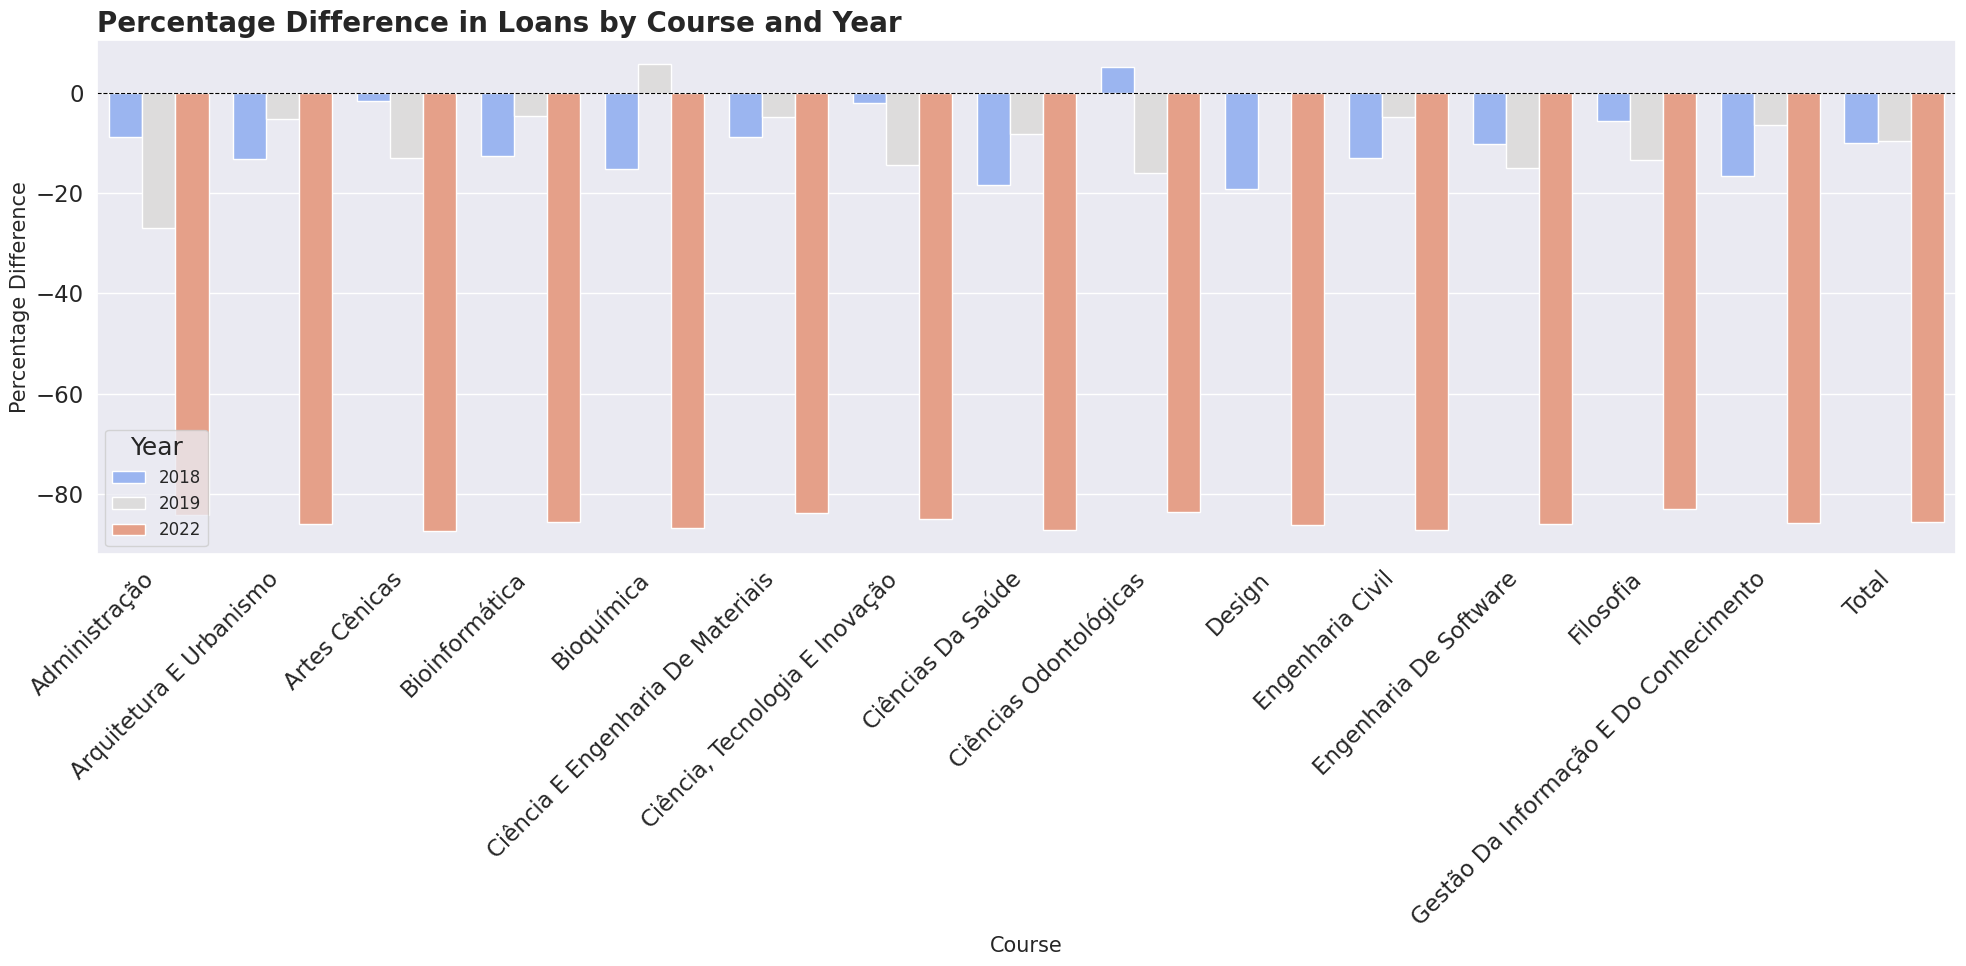

In [55]:
# Plotting the percentage differences for each course
percent_melted = percent.melt(id_vars=['Course'], var_name='Year', value_name='Percentage')

plt.figure(figsize=(20, 10))
sns.barplot(data=percent_melted, x='Course', y='Percentage', hue='Year', palette='coolwarm')
plt.title('Percentage Difference in Loans by Course and Year', fontsize=20, weight='bold', loc='left')
plt.xlabel('Course', fontsize=15)
plt.ylabel('Percentage Difference', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(title='Year', fontsize=12)
plt.tight_layout()
plt.show()

## 4. Summary and Insights

The analysis focused on library loan data from 2010 to 2020, examining trends, user behavior, and course-specific insights. Here's a summary of the findings:

1. **Overall Loan Trends**:
   - The total number of loans and books borrowed were calculated.
   - Loans were analyzed by year, month, and hour, revealing seasonal and hourly borrowing patterns.
   - A significant decline in loans was observed in 2020, likely due to the COVID-19 pandemic.

2. **User Type Analysis**:
   - Loans were categorized by user type (e.g., undergraduate, postgraduate).
   - Undergraduate students accounted for the majority of loans, with detailed analysis of their borrowing patterns.

3. **Collection and Library Analysis**:
   - The "Acervo Circulante" collection was the most borrowed, accounting for over 99% of loans.
   - The "Biblioteca Central Zila Mamede" was the most frequented library, contributing to 68.81% of loans.

4. **Graduate and Postgraduate Analysis**:
   - Graduate and postgraduate students' borrowing patterns were analyzed separately.
   - Graduate students showed consistent borrowing trends, while postgraduate loans were more diverse across courses.

5. **Course-Specific Insights**:
   - Loans were analyzed for selected undergraduate courses (e.g., Law, Philosophy, Pedagogy).
   - A pivot table was created to compare loans across years for these courses.
   - Postgraduate loans were analyzed by course and year, with a forecast for 2022 included.

6. **Percentage Changes**:
   - Percentage differences in loans between years were calculated for postgraduate courses.
   - A significant drop in loans was observed in 2020 across all courses, with a partial recovery forecasted for 2022.

7. **Visualization**:
   - Bar plots and line plots were used to visualize trends and percentage changes.
   - The percentage differences in loans by course and year were highlighted, showing the impact of external factors like the pandemic.

**Key Insights**:
- The pandemic had a significant impact on borrowing patterns, with a sharp decline in 2020.
- Undergraduate students dominate library usage, with specific courses showing higher engagement.
- Postgraduate loans are more evenly distributed across courses, with some courses like "Ciências Odontológicas" and "Ciência, Tecnologia e Inovação" showing higher borrowing rates.
- The forecast for 2022 indicates a gradual recovery in borrowing activity, though still below pre-pandemic levels.

This analysis provides valuable insights into library usage patterns, helping to inform resource allocation, library services, and academic support strategies.